# Web Scraping

In [242]:
# We first load the libraries needed 
import pandas as pd
from gazpacho import get, Soup

Since this is trial data for the NL central (chc), it is to see if the data will be imported properly

In [510]:
# Here we set the variables needed of extraction
team = f"CHC"
batting = f"batteam"
base = f"https://www.baseball-reference.com"
page = f"/teams/{team}/{batting}.shtml"

In [511]:
# Now we implement the variables into gazpacho's parser
url = f'{base}{page}'
html = get(url)
soup = Soup(html)

In [512]:
# We use the soup.find() to locate the table that the data will be extracted from 
table = soup.find('table', {'class':'sortable stats_table'})
table

<table class="sortable stats_table" id="yby_team_bat" data-cols-to-freeze="1"><caption>Year-by-Year Team Batting</caption>
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>      
      <tr>
         <th aria-label="Year" data-stat="year_ID" scope="col" class=" poptip sort_default_asc show_partial_when_sorting left" data-tip="A Star indicates an all-star that season.<br>A Ring indicates the player appeared in WS for winning team.">Year</th>
         <th aria-label=" League AL - American League (1901-present) NL - National League (1876-present) AA - American Association (1882-1891) UA - Union Association (1884) PL - Players League (1890) FL - Federal League (1914-1915) NA - National Association (1871-1875)" data-stat="lg_ID" scope="col" class=" poptip sort_default_asc center" data-tip="<strong>League</strong><br><strong>AL</strong> - American League (1901-present)<br><

After calling the `table` we are able to see the section where the table is located

In [418]:
# Here we use pd.read_html() to read in first table with are yearly batting from a NL central team
trial_data = pd.read_html(str(table))[0]

In [419]:
trial_data

,Year,Lg,W,L,Finish,R/G,G,PA,AB,R,...,BB,SO,"Gold means awarded title at end of year."" data-filter=""1"" data-name=""Batting Average"">BA",OBP,SLG,OPS,E,DP,Fld%,BatAge
0,2019,NL Central,84,78,3,5.02,162,6195,5461,814,...,581,1460,0.252,0.331,0.452,0.783,118,141,0.981,27.7
1,2018,NL Central,95,68,2,4.67,163,6369,5624,761,...,576,1388,0.258,0.333,0.410,0.744,104,155,0.983,27.2
2,2017,NL Central,92,70,1,5.07,162,6283,5496,822,...,622,1401,0.255,0.338,0.437,0.775,95,139,0.984,27.1
3,2016,NL Central,103,58,1,4.99,162,6335,5503,808,...,656,1339,0.256,0.343,0.429,0.772,101,116,0.983,27.4
4,2015,NL Central,97,65,3,4.25,162,6200,5491,689,...,567,1518,0.244,0.321,0.398,0.719,111,120,0.982,26.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1880,NL,67,17,1,6.26,86,3239,3135,538,...,104,217,0.279,0.303,0.360,0.663,329,41,0.913,23.9
140,1879,NL,46,33,4,5.27,83,3189,3116,437,...,73,294,0.259,0.276,0.336,0.613,381,52,0.900,24.8
141,1878,NL,30,30,4,6.08,61,2421,2333,371,...,88,157,0.290,0.316,0.350,0.666,304,37,0.891,26.2
142,1877,NL,26,33,5,6.10,60,2330,2273,366,...,57,111,0.278,0.296,0.340,0.636,313,43,0.883,25.5


# Data Cleaning

In this section we will clean the data by renaming some columns and subsetting the data needed for analysis 

In [420]:
trial_data = trial_data.set_index('Year')

In [421]:
trial_data = trial_data.rename(columns ={'Lg': 'Team', 'Gold means awarded title at end of year." data-filter="1" data-name="Batting Average">BA': 'BA'})

In [422]:
trial_data['Team'] = 'CHC'

In [423]:
trial_data.head(1)

,Team,W,L,Finish,R/G,G,PA,AB,R,H,...,BB,SO,BA,OBP,SLG,OPS,E,DP,Fld%,BatAge
Year,,,,,,,,,,,,,,,,,,,,,
2019,CHC,84,78,3,5.02,162,6195,5461,814,1378,...,581,1460,0.252,0.331,0.452,0.783,118,141,0.981,27.7


In [442]:
trial_data.loc[1950,'H']

Year
2018    1453
2017    1402
2016    1409
2015    1341
Name: H, dtype: int64

In [425]:
trial_data = trial_data.loc[:1950,]
trial_data.tail(2)

,Team,W,L,Finish,R/G,G,PA,AB,R,H,...,BB,SO,BA,OBP,SLG,OPS,E,DP,Fld%,BatAge
Year,,,,,,,,,,,,,,,,,,,,,
1951,CHC,62,92,8,3.96,155,5863,5307,614,1327,...,477,647,0.250,0.315,0.364,0.678,181,161,0.971,28.3
1950,CHC,64,89,7,4.18,154,5794,5230,643,1298,...,479,767,0.248,0.315,0.401,0.716,201,169,0.968,27.5


This is the formula to calculate base runs

In [426]:
A = trial_data.loc[1950,'H'] + trial_data.loc[1950,'BB'] - trial_data.loc[1950,"HR"]
B = (((1.4*trial_data.loc[1950,"SLG"]) - (.6*trial_data.loc[1950,"H"]) - 
      (3*trial_data.loc[1950,"HR"]) + (.1*trial_data.loc[1950,"BB"]))*1.02)
C = (A*B) - trial_data.loc[1950,"H"]
D = trial_data.loc[1950,"HR"]

In [506]:
Base_Run = A*B/(B+C) + D
Base_Run, D

(161.99873378381105, 161)

Now we will create a function that will allow to calculate base runs for the entire NL Central division

In [1021]:
CHC = []
STL = [] 
MIL = []
CIN = []
PIT = []
Years = list(range(2019,1977,-1)) 
def nl_central(tm, tm_list, yrs_list):
    team = f"{tm}"
    batting = f"batteam"
    base = f"https://www.baseball-reference.com"
    page = f"/teams/{team}/{batting}.shtml"
    url = f'{base}{page}'
    html = get(url)
    soup = Soup(html)
    table = soup.find('table', {'class':'sortable stats_table'})
    team_data = pd.read_html(str(table))[0]
    team_data = team_data.set_index('Year')
    team_data = team_data.rename(columns ={'Lg': 'Team', 'Gold means awarded title at end of year." data-filter="1" data-name="Batting Average">BA': 'BA'})
    team_data['Team'] = f'{tm}'
    team_data = team_data.loc[:yrs_list[-1],]
    for y in yrs_list:
        A = team_data.loc[y,'H'] + team_data.loc[y,'BB'] - team_data.loc[y,"HR"]
        B = (((1.4*team_data.loc[y,"SLG"]) - (.6*team_data.loc[y,"H"]) - 
              (3*team_data.loc[y,"HR"]) + (.1*team_data.loc[y,"BB"]))*1.02)
        C = (A*B) - team_data.loc[y,"H"]
        D = team_data.loc[y,"HR"]
        Base_Runs = A*B/(B+C) + D
        tm_list.append(Base_Runs)
    

In [1022]:
nl_central('CHC', CHC, Years)

In [1023]:
nl_central('STL', STL, Years)

In [1024]:
nl_central('CIN', CIN, Years)

In [1025]:
nl_central('PIT', PIT, Years)

In [1026]:
nl_central('MIL', MIL, Years)

In [1027]:
# This dataframe contains the stats of yearly base runs for each team
nl_cent_br = pd.DataFrame({'Years': Years, 'CHC_base_runs':CHC,
                          'STL_base_runs':STL, 'PIT_base_runs':PIT,
                          'CIN_base_runs':CIN, 'MIL_base_runs':MIL})

In [1028]:
nl_cent_br

,Years,CHC_base_runs,STL_base_runs,PIT_base_runs,CIN_base_runs,MIL_base_runs
0,2019,256.998898,210.998844,163.998812,227.998801,250.998919
1,2018,167.998882,205.998835,157.998776,172.998853,218.998864
2,2017,223.998919,196.998887,151.998772,219.998878,224.998856
3,2016,199.998927,225.998869,153.998850,164.998779,194.998840
4,2015,171.998825,137.998782,140.998798,167.998798,145.998721
5,2014,157.998714,105.998716,156.998833,131.998647,150.998725
6,2013,172.998718,125.998813,161.998755,155.998838,157.998729
7,2012,137.998688,159.998887,170.998724,172.998789,202.998833
8,2011,148.998759,162.998888,107.998702,183.998863,185.998822
9,2010,149.998791,150.998851,126.998692,188.998895,182.998884


In this part of the data clean, we will retreive base run stats from the Japan Central League

In [545]:
# Again we will try to see what methods can be use to retreive some trial data
team_id = f"d1014b46"
#batting = f"batteam"
base = f"https://www.baseball-reference.com"
# There is a delimma with obtaining JCL stats due to the id changing every year 
page = f"/register/team.cgi?id={team_id}"

In [546]:
url = f'{base}{page}'
html = get(url)
soup = Soup(html)

In [547]:
# We use the soup.find() to locate the table that the data will be extracted from 
table = soup.find('table', {'class':'sortable stats_table'})
table

<table class="sortable stats_table" id="team_batting" data-cols-to-freeze="2"><caption>Team Batting</caption>
   <colgroup><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col><col></colgroup>
   <thead>      
      <tr>
         <th aria-label=" Rank This is a count of the rows from top to bottom. It is recalculated following the sorting of a column." data-stat="ranker" scope="col" class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-tip="<strong>Rank</strong><br>This is a count of the rows from top to bottom.<br>It is recalculated following the sorting of a column.">Rk</th>
         <th aria-label=" Player Name Bold can mean player is active for this team or player has appeared in MLB * means LHP or LHB, # means switch hitter, + can mean HOFer." data-stat="player" scope="col" class=" poptip sort_default_asc show_partial_when_sorting left" data-tip="<strong>Player Name</strong>

In [710]:
trial_data2 = pd.read_html(str(table))[0]

In [570]:
# here we have obtained the table and now we use len()-1 to get the last row which has the teams total stats for that batting year 
td2 = trial_data2.loc[len(trial_data2["Name"])-1,]
td2

Rk                                                                                                 NaN
Name                                                                                        32 Players
Age                                                                                               28.5
G                                                                                                  130
PA                                                                                                4882
AB                                                                                                4310
R                                                                                                  532
H                                                                                                 1095
2B                                                                                                 154
3B                                                                       

In [555]:
#these next few lines are show us how to clean and reorganize the data
td2['Name'] = 'Hanshin'
td2['Rk'] = 1979

In [870]:
l = [td2]
l

[Rk                                                                                             2016
 Name                                                                                        Hanshin
 Age                                                                                            28.5
 G                                                                                               130
 PA                                                                                             4882
 AB                                                                                             4310
 R                                                                                               532
 H                                                                                              1095
 2B                                                                                              154
 3B                                                                                        

In [871]:
t = pd.DataFrame(l)
t = t.rename(columns = {'Rk': 'Year'}).set_index('Year')
t

,Name,Age,G,PA,AB,R,H,2B,3B,HR,...,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB,Notes
Year,,,,,,,,,,,,,,,,,,,,,
2016,Hanshin,28.5,130,4882,4310,532,1095,154,15,139,...,0.323,0.394,0.717,1696,84,44,93,25,28,NaN


In [913]:
# Due to the dilemma of the JPL id keep changing every year, we are going to find the id(s) and append them to separate lists
Chunichi = []
Hanshin = []
Yokohama = []
Yomiuri = []
Yakult = []
Hiroshima = []
Yrs = list(range(2019,1977,-1))
def jpl_central(team,j_list):
    temp_list =[]
    url = 'https://www.baseball-reference.com/register/league.cgi?code=JPCL&class=Fgn'
    html = get(url)
    soup = Soup(html)
    jcl_league = soup.find('a', {'href':'/register/team.cgi?id='})
    j_teams = str(jcl_league)
    jpl_teams =j_teams.split(',')
    for i in range(len(jpl_teams)):
        if team in jpl_teams[i]:
            pl = jpl_teams[i].index('id')
            temp_list.append(jpl_teams[i][pl:pl+11])
    for j in range(len(Yrs)):
        j_list.append(temp_list[j])
        

In [914]:
jpl_central('Chunichi', Chunichi)

In [915]:
jpl_central('Hanshin',Hanshin)

In [916]:
jpl_central('Yakult',Yakult)

In [917]:
jpl_central('Yokohama',Yokohama)

In [918]:
jpl_central('Yomiuri', Yomiuri)

In [919]:
jpl_central('Hiroshima',Hiroshima)

In [920]:
Yokohama[:2],Yakult[:2],Hanshin[:2],Hiroshima[:2],Chunichi[:2],Yomiuri[:2]

(['id=d2ea2428', 'id=92d65bc7'],
 ['id=d00aa3af', 'id=f6a52d12'],
 ['id=7bb19d32', 'id=61a8fa8f'],
 ['id=a4018d4c', 'id=4d53b28f'],
 ['id=440abdcc', 'id=5b8c0aae'],
 ['id=6801865d', 'id=e9a26cba'])

In [921]:
Yakult_BR = []
Yokohama_BR = []
Yomiuri_RB = []
Hanshin_RB= []
Hiroshima_RB = []
Chunichi_RB = []
def jpl_BR(city_ids,city,team_arr):
    for id in city_ids:
        base = f"https://www.baseball-reference.com" 
        page = f"/register/team.cgi?{id}"
        url = f'{base}{page}'
        html = get(url)
        soup = Soup(html)
        table = soup.find('table', {'class':'sortable stats_table'})
        jpl_data = pd.read_html(str(table))[0] 
        jpl = jpl_data.loc[len(jpl_data["Name"])-1,] # This line retreives the year stats of each team
        jpl['Name'] = city
        team_arr.append(jpl)    
        
      

In [922]:
jpl_BR(Yakult,'Yakult', Yakult_BR)

In [923]:
jpl_BR(Yokohama,'Yokohama', Yokohama_BR)

In [924]:
jpl_BR(Yomiuri,'Yomiuri', Yomiuri_RB)

In [925]:
jpl_BR(Hanshin,'Hanshin', Hanshin_RB)

In [926]:
jpl_BR(Chunichi,'Chunichi', Chunichi_RB)

In [927]:
jpl_BR(Hiroshima, 'Hiroshima', Hiroshima_RB)

In [967]:
Yakult_df = pd.DataFrame(Yakult_BR).sort_index().drop('Rk',1)
Yakult_df['Year'] = Yrs
Yakult_df = Yakult_df.set_index('Year')

In [968]:
Chunichi_df = pd.DataFrame(Chunichi_RB).sort_index().drop('Rk',1)
Chunichi_df['Year'] = Yrs
Chunichi_df = Chunichi_df.set_index('Year')

In [969]:
Hiroshima_df = pd.DataFrame(Hiroshima_RB).sort_index().drop('Rk',1)
Hiroshima_df['Year'] = Yrs
Hiroshima_df = Hiroshima_df.set_index('Year')

In [970]:
Hanshin_df = pd.DataFrame(Hanshin_RB).sort_index().drop('Rk',1)
Hanshin_df['Year'] = Yrs
Hanshin_df = Hanshin_df.set_index('Year')

In [974]:
Yomiuri_df = pd.DataFrame(Yomiuri_RB).sort_index().drop('Rk',1)
Yomiuri_df['Year'] = Yrs
Yomiuri_df.set_index('Year')
Yomiuri_df = Yomiuri_df.set_index('Year')

In [975]:
Yokohama_df = pd.DataFrame(Yokohama_BR).sort_index().drop('Rk',1)
Yokohama_df['Year'] = Yrs
Yokohama_df =Yokohama_df.set_index('Year')

In [976]:
Yakult_df.head(2), Yomiuri_df.tail(2)

(        Name   Age    G    PA    AB    R     H   2B  3B   HR  ...    OBP  \
 Year                                                          ...          
 2019  Yakult  30.7  130  4841  4378  557  1166  177  18  149  ...  0.315   
 2018  Yakult  28.3  130  4837  4341  496  1069  190  16  147  ...  0.301   
 
         SLG    OPS    TB  GDP  HBP   SH  SF  IBB  Notes  
 Year                                                     
 2019  0.417  0.732  1826   87   34  109  28   31    NaN  
 2018  0.399  0.700  1732   85   31  119  27   37    NaN  
 
 [2 rows x 26 columns],
          Name   Age    G    PA    AB    R     H   2B  3B   HR  ...    OBP  \
 Year                                                           ...          
 1979  Yomiuri  30.6  138  5395  4845  738  1332  219   6  259  ...  0.339   
 1978  Yomiuri  28.8  143  5537  4835  663  1242  221  15  183  ...  0.335   
 
         SLG    OPS    TB  GDP  HBP  SH  SF  IBB  Notes  
 Year                                                   

In [977]:
Dragons = []
Tigers = []
Carp = []
Swallows = []
Stars = []
Giants = []

def jpl_base_run(team_data,tm_list,yrs_list):
    for y in yrs_list:
        A = team_data.loc[y,'H'] + team_data.loc[y,'BB'] - team_data.loc[y,"HR"]
        B = (((1.4*team_data.loc[y,"SLG"]) - (.6*team_data.loc[y,"H"]) - 
              (3*team_data.loc[y,"HR"]) + (.1*team_data.loc[y,"BB"]))*1.02)
        C = (A*B) - team_data.loc[y,"H"]
        D = team_data.loc[y,"HR"]
        Base_Runs = A*B/(B+C) + D
        tm_list.append(Base_Runs)

In [978]:
jpl_base_run(Yokohama_df,Stars,Yrs)

In [979]:
jpl_base_run(Yakult_df,Swallows,Yrs)

In [980]:
jpl_base_run(Yomiuri_df,Giants,Yrs)

In [981]:
jpl_base_run(Hanshin_df,Tigers,Yrs)

In [982]:
jpl_base_run(Hiroshima_df,Carp,Yrs)

In [983]:
jpl_base_run(Chunichi_df,Dragons,Yrs)

In [984]:
# This dataframe contains the stats of yearly base runs for each team
jpl_cent_br = pd.DataFrame({'Years': Yrs, 'Chunichi_base_runs':Dragons,
                          'Hanshin_base_runs':Tigers, 'Hiroshima_base_runs': Carp,
                          'Yakult_base_runs':Swallows, 'Yokohama_base_runs':Stars, 'Yomiuri_base_runs':Giants})

In [985]:
jpl_cent_br

,Years,Chunichi_base_runs,Hanshin_base_runs,Hiroshima_base_runs,Yakult_base_runs,Yokohama_base_runs,Yomiuri_base_runs
0,2019,191.998662,172.998565,172.998596,149.998456,132.998599,133.998433
1,2018,141.998497,139.998509,143.998513,147.998392,135.998518,135.998496
2,2017,151.998507,134.998506,161.998537,140.998553,135.998576,186.998634
3,2016,155.998540,114.998493,137.998425,120.998367,105.998413,153.998406
4,2015,143.998468,169.998597,139.998443,95.998283,100.998669,156.998627
5,2014,131.998525,94.998648,181.998571,157.998475,143.998694,122.998519
6,2013,97.998599,118.998457,160.998679,157.998601,84.998323,154.998514
7,2012,160.998585,165.998558,205.998732,140.998641,76.998363,159.998532
8,2011,134.998430,184.998588,86.998307,159.998503,137.998595,134.998516
9,2010,131.998312,140.998342,105.998381,140.998445,100.998483,157.998651


# Data Analysis

In [996]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

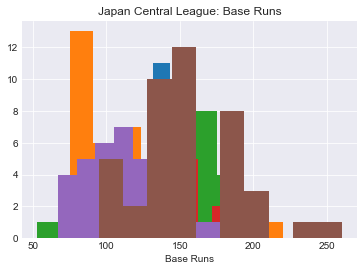

In [1029]:
names = ['Chunichi_base_runs', 'Hanshin_base_runs', 'Hiroshima_base_runs', 
         'Yakult_base_runs', 'Yokohama_base_runs', 'Yomiuri_base_runs']

plt.hist(jpl_cent_br[names[0]])
plt.hist(jpl_cent_br[names[1]])
plt.hist(jpl_cent_br[names[2]])
plt.hist(jpl_cent_br[names[3]])
plt.hist(jpl_cent_br[names[4]])
plt.hist(jpl_cent_br[names[5]])

plt.xlabel('Base Runs')
plt.title('Japan Central League: Base Runs')
plt.show()

We can tell from the JPL(central) that the data is skewed more the right of the graph this usually means that the the mean is typically greater than the median.

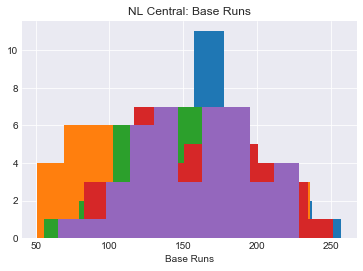

In [1030]:
names2 = ['CHC_base_runs', 'STL_base_runs', 'PIT_base_runs', 
         'MIL_base_runs', 'CIN_base_runs']

plt.hist(nl_cent_br[names2[0]])
plt.hist(nl_cent_br[names2[1]])
plt.hist(nl_cent_br[names2[2]])
plt.hist(nl_cent_br[names2[3]])
plt.hist(nl_cent_br[names2[4]])

plt.xlabel('Base Runs')
plt.title('NL Central: Base Runs')
plt.show()

From the NL(central) data, we see that most of the data is closer to the middle which means is has somewhat of a normal distribution.

Next, we will compare two teams from each league and see which is better.

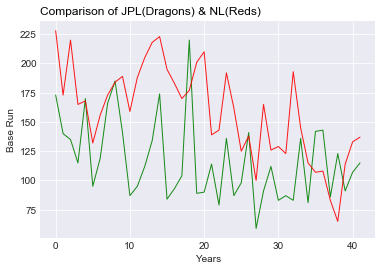

In [1039]:
plt.style.use('seaborn-darkgrid')
plt.plot(jpl_cent_br[names[]], color='Green', linewidth=1, alpha=0.9)
plt.plot(nl_cent_br[names2[-1]], color='Red', linewidth=1, alpha=0.9)
plt.title("Comparison of JPL(Dragons) & NL(Reds)", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Years")
plt.ylabel("Base Run")
plt.show()

From this line graph, we can see that the Reds(NL) have steadily decline over the years while Dragons(JPL) are maintaining a constant rate over the past 30 years.

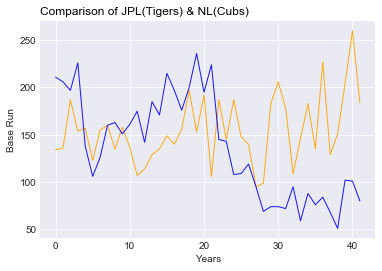

In [1040]:
 plt.style.use('seaborn-darkgrid')
plt.plot(jpl_cent_br[names[5]], color='Orange', linewidth=1, alpha=0.9)
plt.plot(nl_cent_br[names2[1]], color='Blue', linewidth=1, alpha=0.9)
plt.title("Comparison of JPL(Tigers) & NL(Cubs)", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Years")
plt.ylabel("Base Run")
plt.show()

From this line graph, we see that the Cubs have rapidly decline over the past 30 years while the Tigers have consistantly increase their base run abilities. The Tigers could have gain this increase in better base running due to better coaching and conditioning staffs.

In [1041]:
jpl_cent_br.to_csv('jpl_cent_br.csv')

In [1042]:
nl_cent_br.to_csv('nl_cent_br.csv')